In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from statsmodels.tsa.stattools import acf, pacf
from tqdm import tqdm
from pylab import rcParams

In [2]:
air_in = pd.read_excel('04Prioxko-Terrasnyi_774_BZ_aprel_2018.xls')
ai_without_rec = pd.read_excel('04Prioxko-Terrasnyi_774_BZ_aprel_2018.xls')

In [3]:
air_in = air_in[air_in.YY.notnull()]

In [4]:
df = air_in
df1 = air_in

In [5]:
date = []
for i in range(len(df)):
    year = df['YY'].iloc[i]
    if np.isnan(year):
        df1 = df1.drop([i])
        continue
    year = int(year)
    if year >= 83:
        year += 1900
    else:
        year += 2000
    month = int(df['MM'].iloc[i])
    day = int(df['DD'].iloc[i])
    try:
        if day < 10 and month < 10:
            data = np.datetime64(f'{year}-0{month}-0{day}')
        elif day < 10:
            data = np.datetime64(f'{year}-{month}-0{day}')
        elif month < 10:
            data = np.datetime64(f'{year}-0{month}-{day}')
        else:
            data = np.datetime64(f'{year}-{month}-{day}')
    except ValueError:
        df1 = df1.drop([i])
        continue
    date.append(data)

In [6]:
len(air_in)

12069

In [7]:
air_in.drop(labels=5213, inplace=True)

In [8]:
air_in['date'] = date

In [9]:
#fill empty columns in air_in
columns = ['TSP', 'SO2', 'SO4', 'NO2']
window = 21
nans = []
for column in columns:
    count = 0    
    s = 0 
    for i in range(len(air_in)):
        if not math.isnan(air_in[column].iloc[i]):
            count += 1
            s += air_in[column].iloc[i]
        else:
            nans.append(i)
        if math.isnan(air_in[column].iloc[i]):
            if count == 0:
                air_in.iloc[i, air_in.columns.get_loc(column)] = 0
            else:
                air_in.iloc[i, air_in.columns.get_loc(column)] = s / count
        if i > window:
            if not ((i - window) in nans):
                count -= 1
                s -= air_in[column].iloc[i - window]

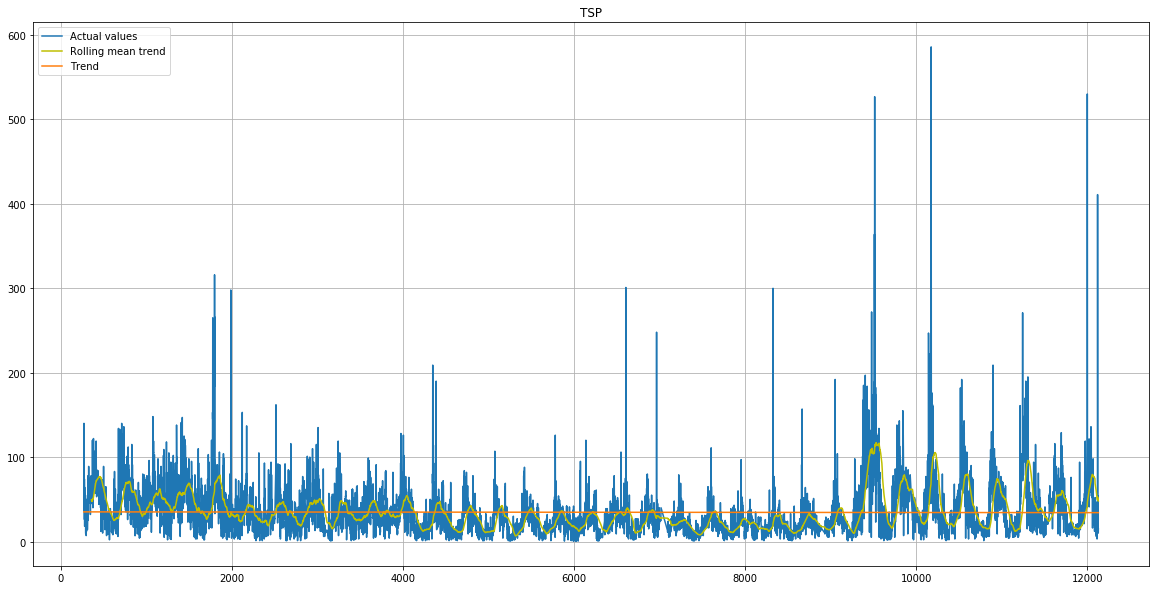

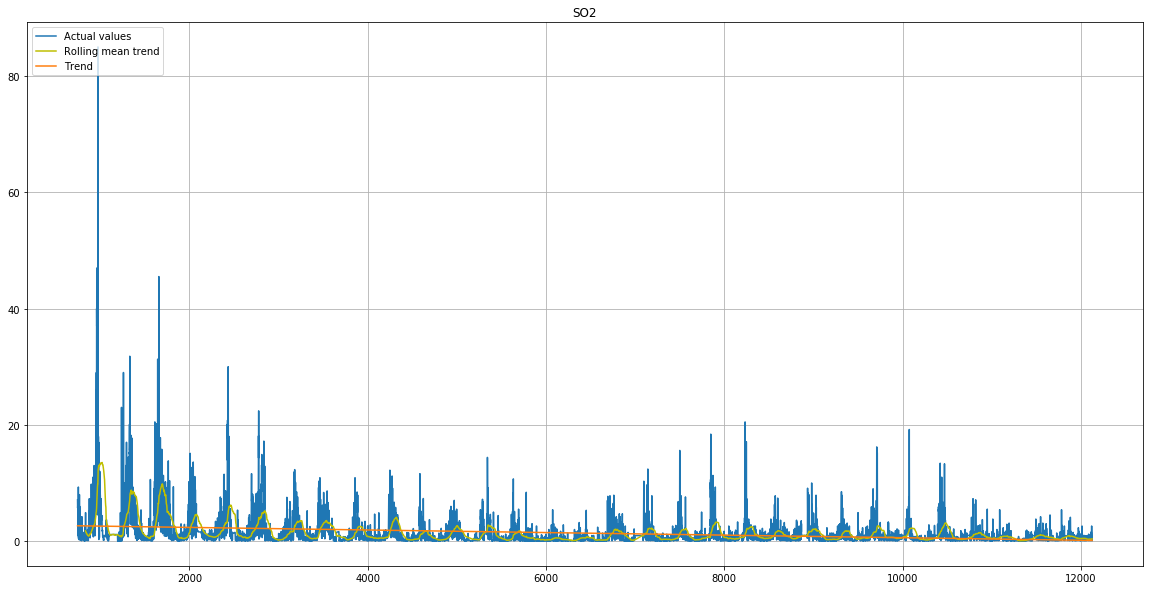

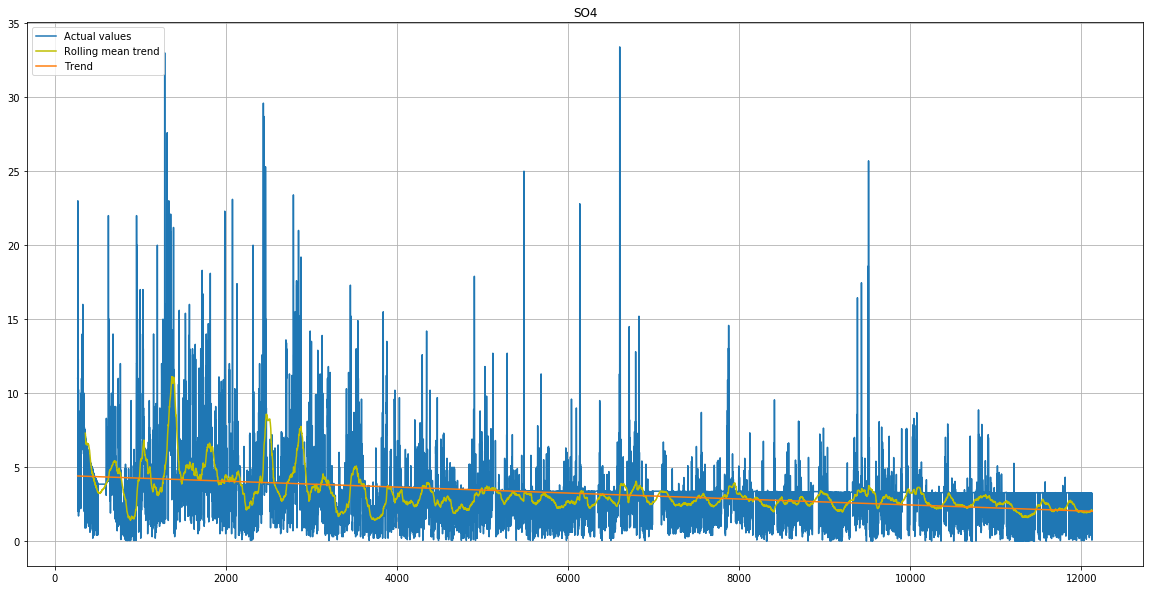

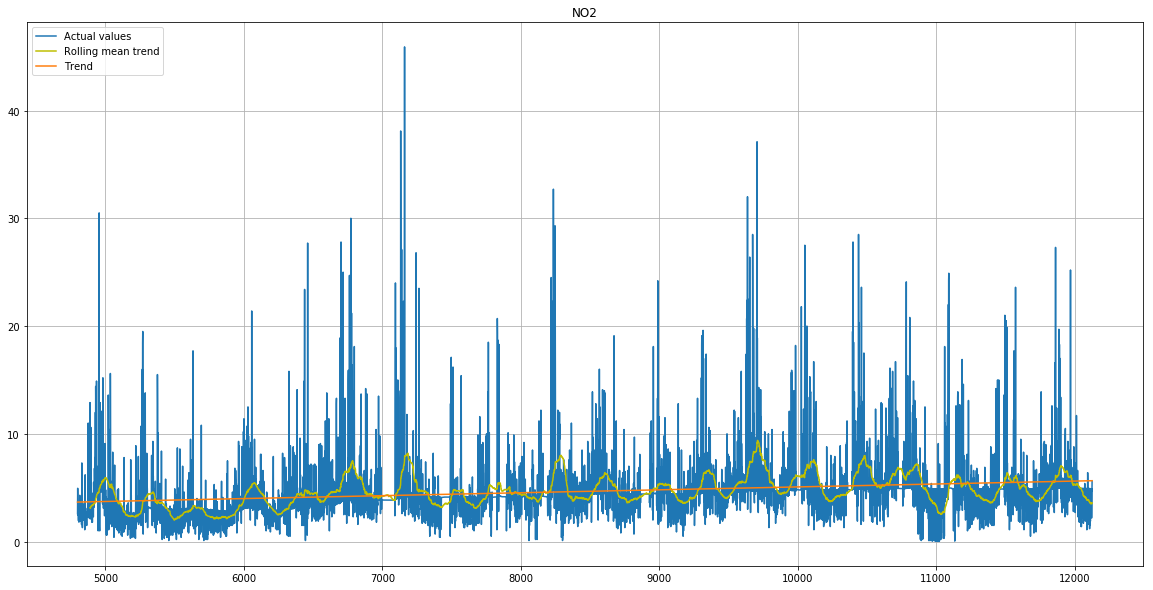

In [10]:
columns = ['TSP', 'SO2', 'SO4', 'NO2']
for column in columns:
    series = air_in[air_in[column] != 0][column]
    n = 90
    rolling_mean = series.rolling(window=n).mean()

    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std

    plt.figure(figsize=(20,10))
    plt.title(column)
    plt.plot(series, label="Actual values")
    plt.plot(rolling_mean, "y", label="Rolling mean trend")

    plt.legend(loc="upper left")
    a = np.polyfit(list(series.index), list(series), deg=1)
    x = list(series.index)
    y = [a[0] * c + a[1] for c in x]
    plt.plot(x, y, color="C1", label='Trend')
    plt.legend(loc='upper left')
    plt.grid(True)
#     plt.savefig(column+'.png')

In [12]:
for column in columns:
    series = air_in[air_in[column] != 0][column]
    print(column + " Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(series)[1])

TSP Критерий Дики-Фуллера: p=0.000000
SO2 Критерий Дики-Фуллера: p=0.000000
SO4 Критерий Дики-Фуллера: p=0.000000
NO2 Критерий Дики-Фуллера: p=0.000000


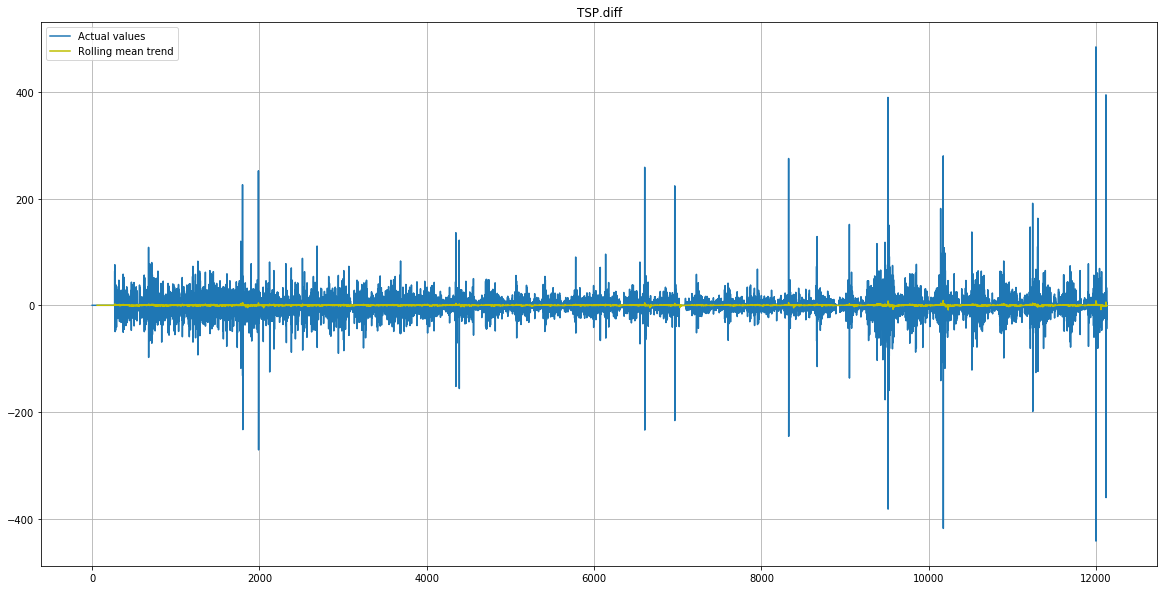

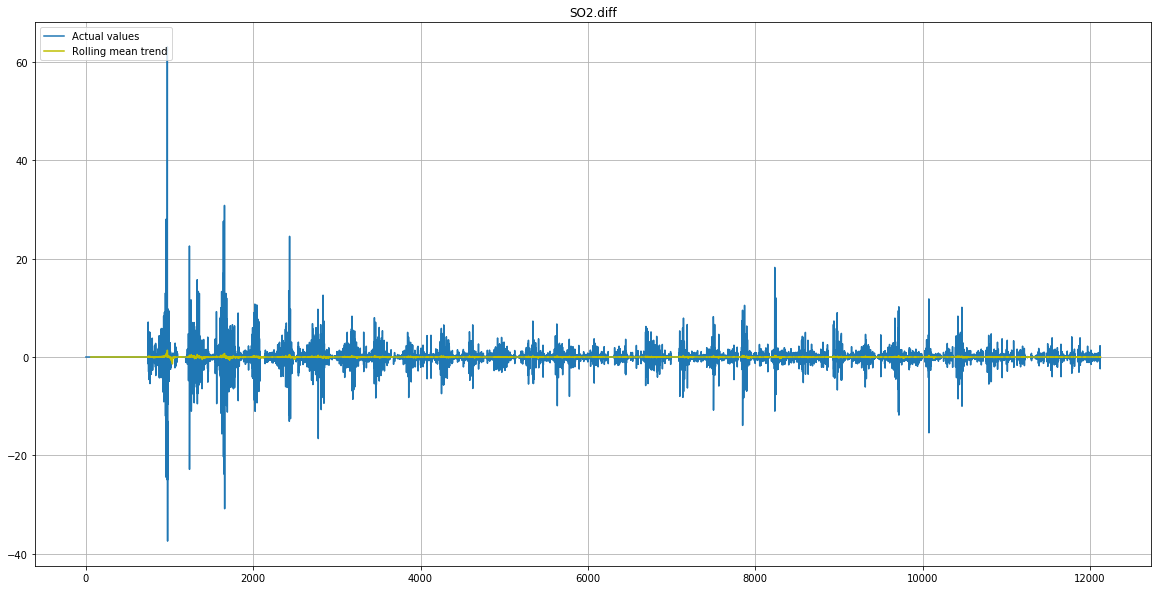

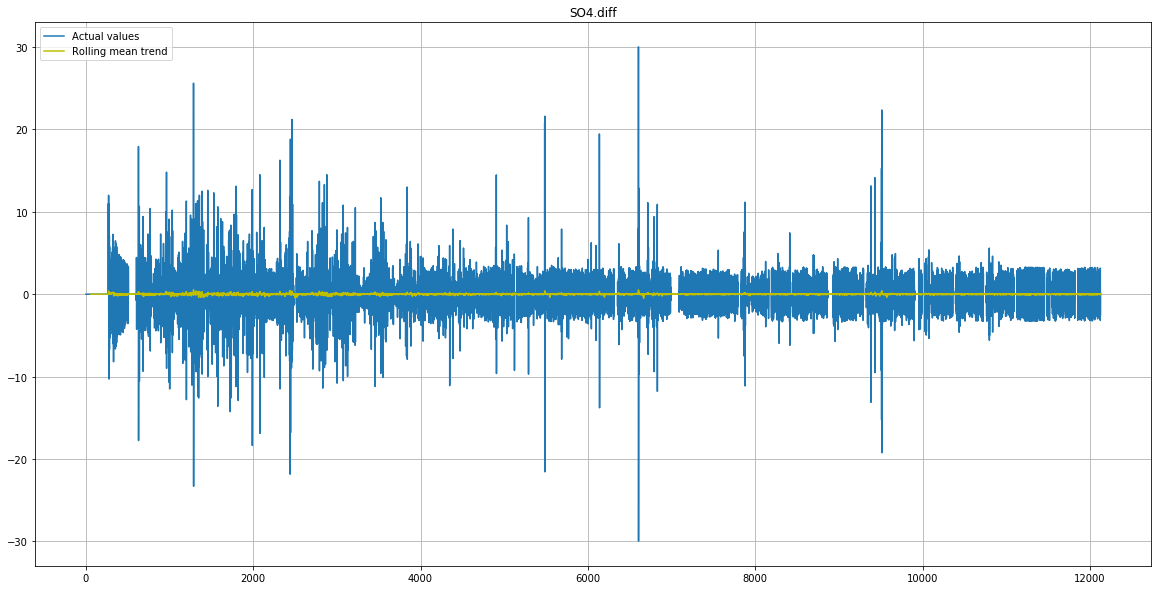

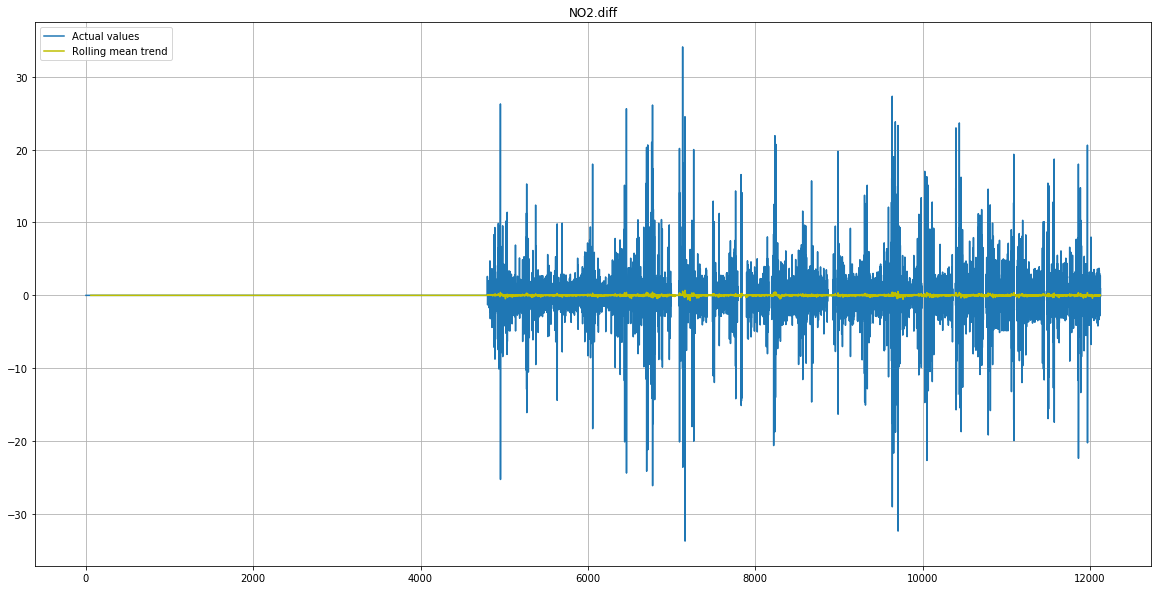

In [25]:
for column in columns:
    series = air_in[column].diff()
    n = 60
    rolling_mean = series.rolling(window=n).mean()

    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std
    plt.figure(figsize=(20,10))
    plt.title(column+'.diff')
    plt.plot(series, label="Actual values")
    plt.plot(rolling_mean, "y", label="Rolling mean trend")

    plt.legend(loc="upper left")
    plt.grid(True)

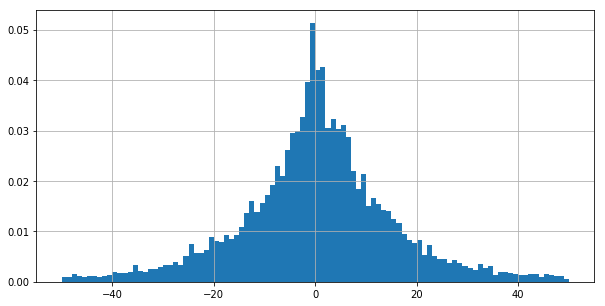

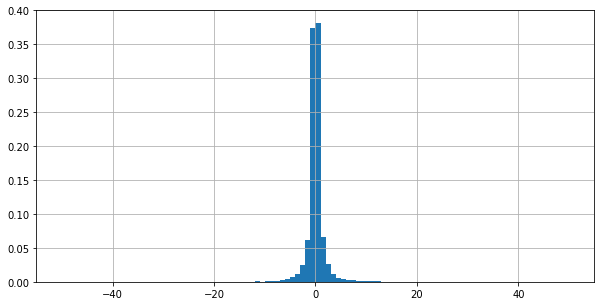

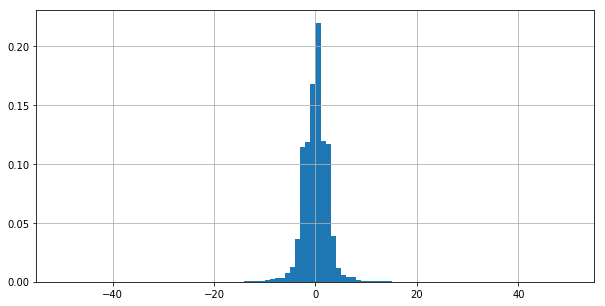

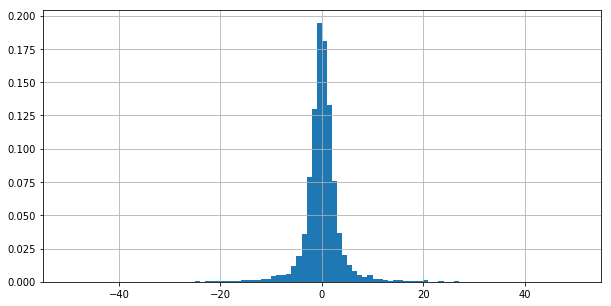

In [14]:
air_in_diff = air_in[columns].diff().dropna()
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(air_in_diff[air_in_diff[column] != 0][column], density=True, bins=100, range = (-50, 50))
    plt.grid(True)

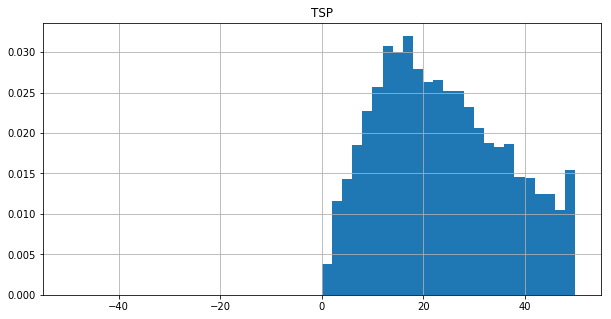

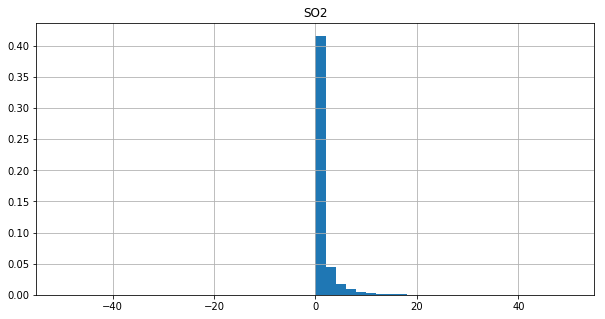

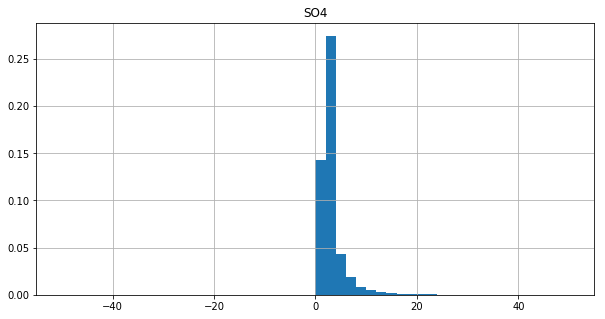

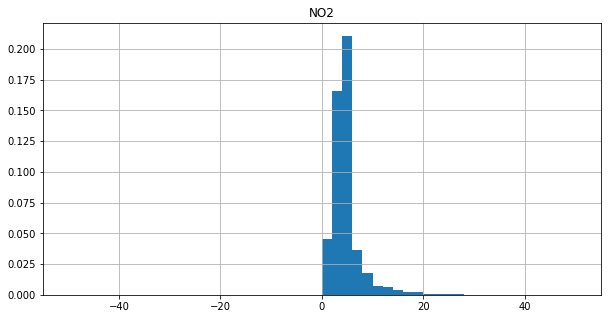

In [15]:
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.title(column)
    plt.hist(air_in[air_in[column] != 0][column], density=True, bins=50, range = (-50, 50))
    plt.grid(True)

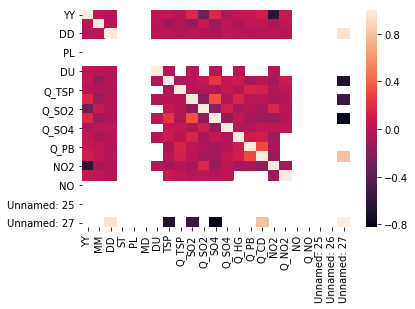

In [11]:
sns.heatmap(air_in.corr(method='pearson'))

(array([1.56536170e-02, 1.69404094e-02, 2.37985884e-02, 2.08432082e-02,
        1.91039174e-02, 1.47769013e-02, 1.26275338e-02, 8.14497144e-03,
        8.24395547e-03, 6.50466469e-03, 4.52498413e-03, 4.04420457e-03,
        3.13920774e-03, 2.48874127e-03, 1.86655596e-03, 1.59788502e-03,
        1.25851121e-03, 9.75699704e-04, 8.20153374e-04, 5.65623017e-04,
        5.37341866e-04, 3.11092659e-04, 3.39373810e-04, 2.82811508e-04,
        1.55546330e-04, 1.41405754e-04, 1.13124603e-04, 1.13124603e-04,
        8.48434525e-05, 9.89840279e-05, 5.65623017e-05, 8.48434525e-05,
        7.07028771e-05, 2.82811508e-05, 0.00000000e+00, 2.82811508e-05,
        0.00000000e+00, 1.41405754e-05, 0.00000000e+00, 0.00000000e+00,
        1.41405754e-05, 1.41405754e-05, 2.82811508e-05, 0.00000000e+00,
        0.00000000e+00, 2.82811508e-05, 2.82811508e-05, 0.00000000e+00,
        0.00000000e+00, 1.41405754e-05, 1.41405754e-05, 2.82811508e-05,
        1.41405754e-05, 1.41405754e-05, 0.00000000e+00, 0.000000

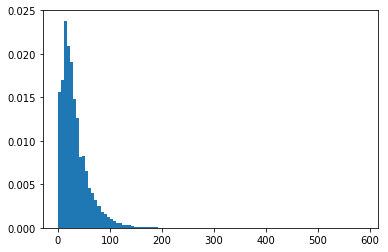

In [12]:
plt.hist(air_in.TSP.dropna().tolist(), density=True, bins=100)

In [13]:
columns = ['TSP', 'SO2', 'SO4', 'NO2']

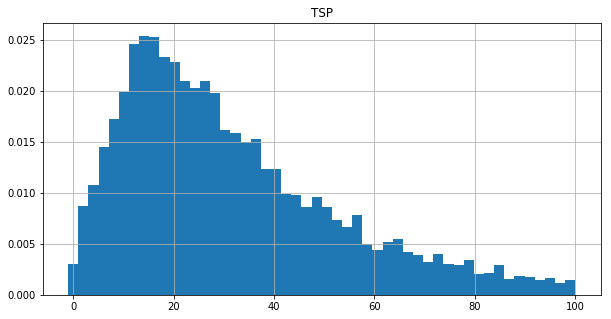

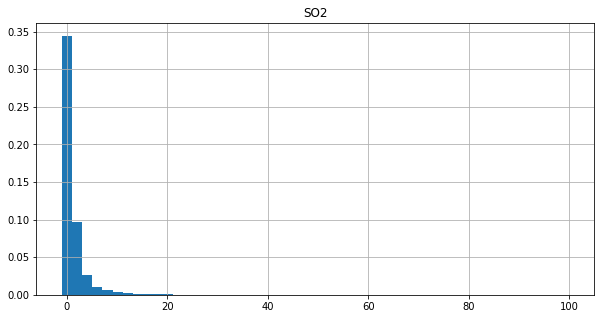

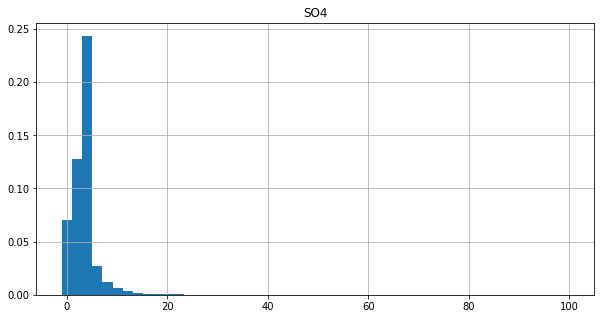

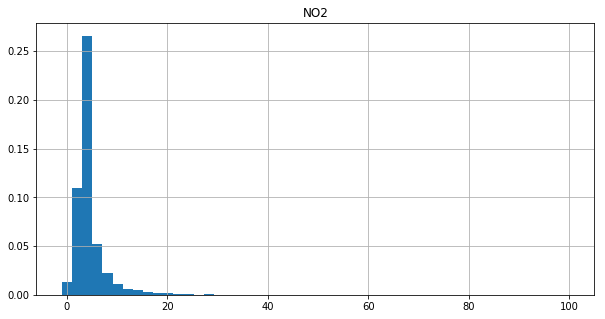

In [14]:
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.title(column)
    plt.hist(air_in[air_in[column] != 0][column], density=True, bins=50, range = (-1, 100), cumulative=False)
    plt.grid(True)

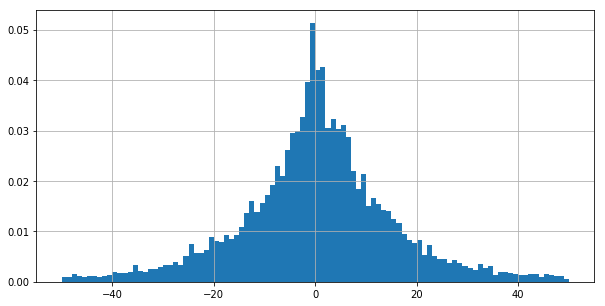

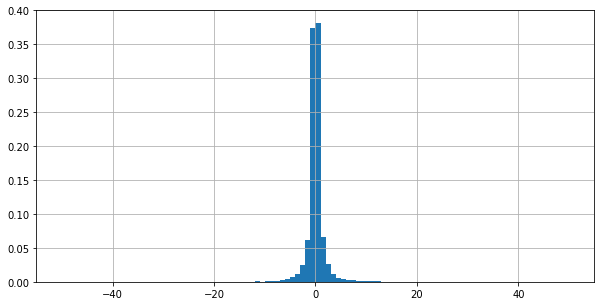

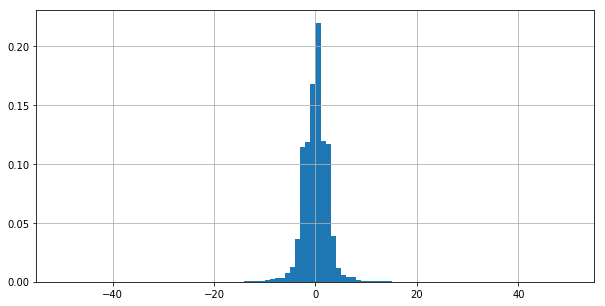

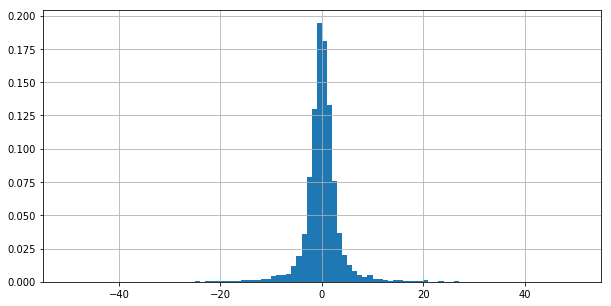

In [20]:
air_in_diff = air_in[columns].diff().dropna()
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(air_in_diff[air_in_diff[column] != 0][column], density=True, bins=100, range = (-50, 50))
    plt.grid(True)

In [21]:
columns = ['TSP', 'SO2', 'SO4', 'NO2']

/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


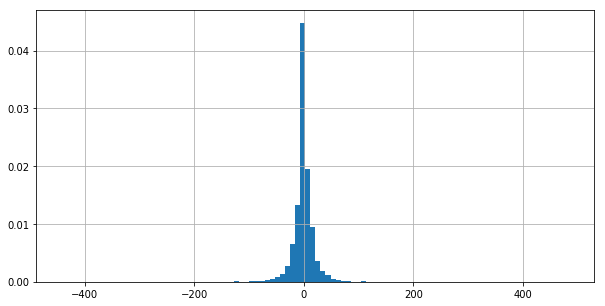

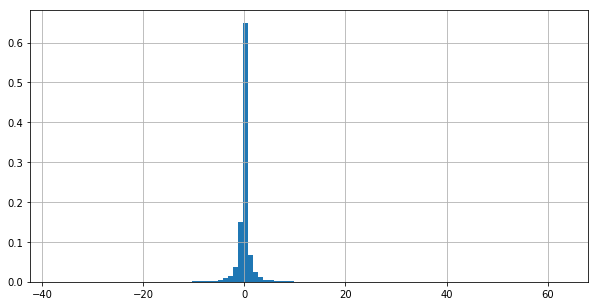

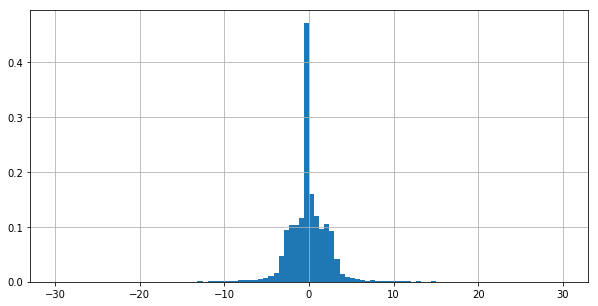

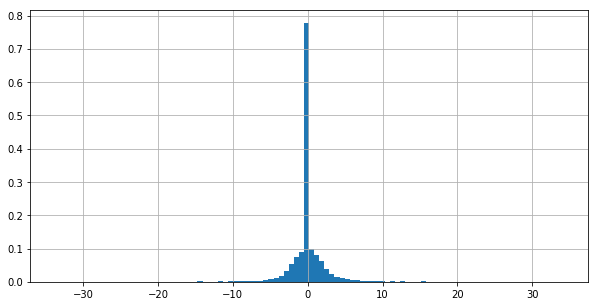

In [22]:
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(air_in[column].dropna().diff(), density=True, bins=100 )
    plt.grid(True)

In [23]:
air_in['TSP'].dropna().diff().describe()

count    12067.000000
mean         0.001243
std         22.658385
min       -441.945455
25%         -6.000000
50%          0.000000
75%          6.112500
max        484.240000
Name: TSP, dtype: float64

In [24]:
from scipy import stats
from scipy.stats import kstest

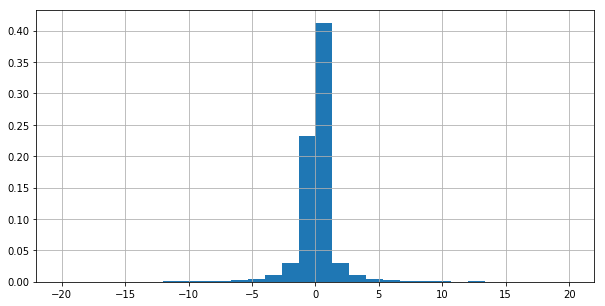

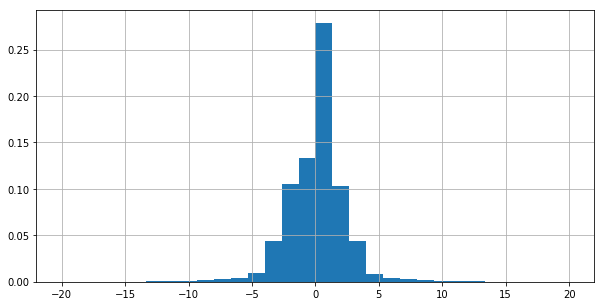

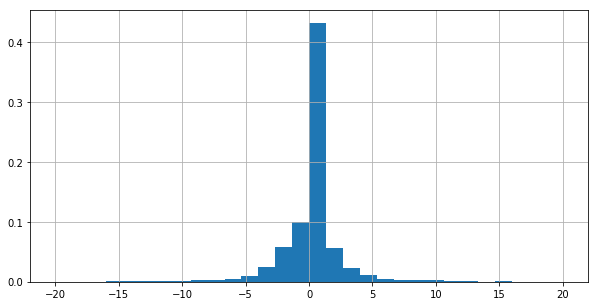

In [25]:
columns = ['SO2', 'SO4', 'NO2']
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(air_in[column].dropna().diff(), density=True, bins=30, range = (-20, 20))
    plt.grid(True)

In [26]:
winter_df = air_in[air_in.MM.isin([12.0, 1.0, 2.0])]
spring_df = air_in[air_in.MM.isin([3.0, 4.0, 5.0])]
summer_df = air_in[air_in.MM.isin([6.0, 7.0, 8.0])]
autumn_df = air_in[air_in.MM.isin([9.0, 10.0, 11.0])]

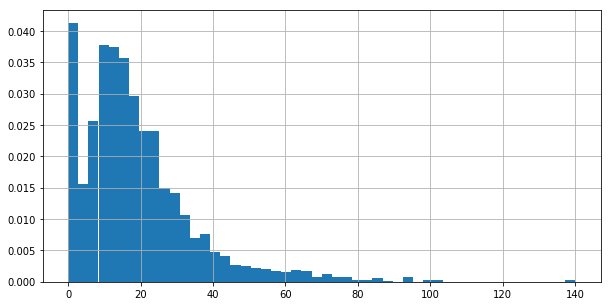

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(winter_df['TSP'].dropna(), density=True, bins=50)
plt.grid(True)

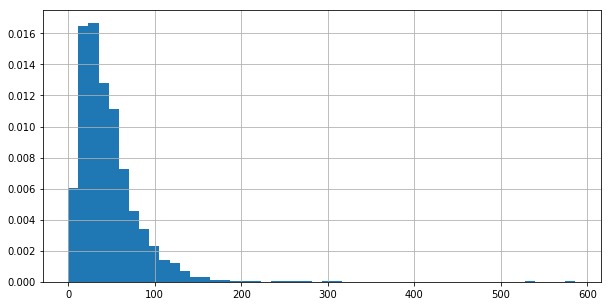

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(spring_df['TSP'].dropna(), density=True, bins=50)
plt.grid(True)

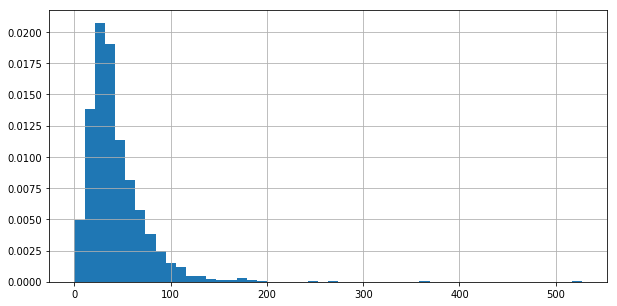

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(summer_df['TSP'].dropna(), density=True, bins=50)
plt.grid(True)

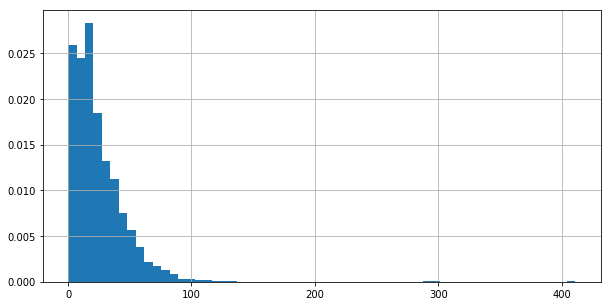

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(autumn_df['TSP'].dropna(), density=True, bins=60)
plt.grid(True)

In [31]:
air_in[air_in.TSP >= 100]['MM'].value_counts()

5.0     146
6.0      65
4.0      56
7.0      36
8.0      24
9.0      10
3.0       9
10.0      5
11.0      4
1.0       3
2.0       1
Name: MM, dtype: int64

In [32]:
air_in[air_in.TSP >= 300]

,YY,MM,DD,ST,PL,MD,DU,TSP,Q_TSP,SO2,...,NO2,Q_NO2,NO,Q_NO,Примечание,с аэрозол,Unnamed: 25,Unnamed: 26,Unnamed: 27,date
1798,89.0,5.0,17.0,4.0,1.0,1.0,1.0,316.00,0.0,0.61,...,0.0,NaN,NaN,NaN,NaN,0.0300633,NaN,NaN,NaN,1989-05-17
6605,2.0,9.0,8.0,4.0,1.0,1.0,1.0,301.00,0.0,0.05,...,4.3,0.0,NaN,NaN,задымление,0,NaN,NaN,NaN,2002-09-08
8325,7.0,5.0,10.0,4.0,1.0,1.0,1.0,300.00,NaN,0.30,...,4.6,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2007-05-10
9510,10.0,8.0,5.0,4.0,1.0,1.0,1.0,364.00,NaN,0.90,...,5.8,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2010-08-05
9513,10.0,8.0,8.0,4.0,1.0,1.0,1.0,527.00,NaN,1.30,...,6.5,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2010-08-08
10172,12.0,5.0,26.0,4.0,1.0,1.0,1.0,306.00,NaN,0.60,...,5.1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2012-05-26
10173,12.0,5.0,27.0,4.0,1.0,1.0,1.0,586.00,NaN,0.60,...,5.4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2012-05-27
11998,17.0,5.0,24.0,4.0,1.0,1.0,1.0,530.24,NaN,0.30,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-24
12118,17.0,9.0,21.0,4.0,1.0,1.0,1.0,411.00,NaN,1.60,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-21


In [33]:
from scipy import stats

# PoVT

In [34]:
tsp = air_in['TSP'].dropna().tolist()

In [35]:
s = air_in['TSP'].dropna()

In [35]:
def get_pareto_data(l, s):
    res = []
    for i in l:
        if i - s > 0:
            res.append(i - s)
    return res

In [36]:
def get_expon_data(series, s):
    res = []
    series = series[series >= s]
    prev_i = series.index[0]
    for i in list(series.index)[1:]:
        res.append(i - prev_i)
        prev_i = i
    return res

In [38]:
tsp = air_in['TSP'].dropna().tolist()
tsp_series = air_in['TSP'].dropna()

for s in tqdm(np.linspace(0, max(tsp), num=10000)):
    pareto_data = get_pareto_data(tsp, s)
    expon_data = get_expon_data(tsp_series, s)
    params_pareto = stats.genpareto.fit(pareto_data)
    params_expon = stats.expon.fit(expon_data)
    if stats.kstest(pareto_data, 'genpareto', args=params_pareto).pvalue > 0.01 and stats.kstest(expon_data, 'expon', args=params_expon).pvalue > 0.01:
        povt = s
        pvalue_pareto = stats.kstest(pareto_data, 'genpareto', args=params_pareto).pvalue
        pvalue_expon = stats.kstest(expon_data, 'expon', args=params_expon).pvalue 
        break
        
        

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
  0%|          | 27/10000 [00:09<1:00:58,  2.73it/s]

KeyboardInterrupt: 

In [44]:
povt

244.02002002002

In [47]:
pvalue_pareto = stats.kstest(pareto_data, 'genpareto', args=params_pareto).pvalue
pvalue_expon = stats.kstest(expon_data, 'expon', args=params_expon).pvalue 

In [44]:
air_in[air_in.TSP > povt].MM.value_counts()

5.0     6
8.0     3
4.0     3
9.0     2
11.0    2
7.0     1
Name: MM, dtype: int64

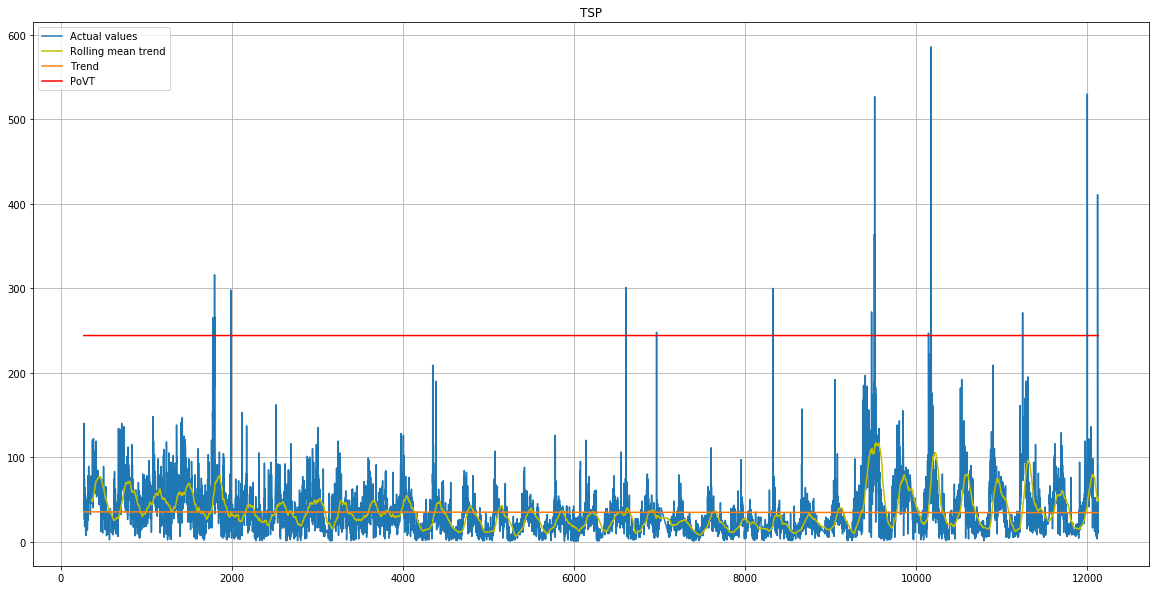

In [49]:
column = 'TSP'
series = air_in[air_in[column] != 0][column]
n = 90
rolling_mean = series.rolling(window=n).mean()

rolling_std =  series.rolling(window=n).std()
upper_bond = rolling_mean+1.96*rolling_std

plt.figure(figsize=(20,10))
plt.title(column)
plt.plot(series, label="Actual values")
plt.plot(rolling_mean, "y", label="Rolling mean trend")

plt.legend(loc="upper left")
a = np.polyfit(list(series.index), list(series), deg=1)
x = list(series.index)
y = [a[0] * c + a[1] for c in x]
plt.plot(x, y, color="C1", label='Trend')
y = [povt for c in x]
plt.plot(x, y, color="red", label='PoVT')
plt.legend(loc='upper left')
plt.grid(True)

In [268]:
a[0]

-7.630371478306367e-05

In [280]:
real_tsp = ai_without_rec['TSP'].dropna()

In [286]:
def get_year(y):
    if y <= 17:
        return y + 2000
    else:
        return y + 1900
    
    
ai_without_rec['year'] =  ai_without_rec['YY'].apply(get_year)

In [294]:
for year in ai_without_rec['year'].dropna().unique().tolist():
    print(year)
    series = ai_without_rec[ai_without_rec.year >= year]['TSP'].dropna()
    a = np.polyfit(list(series.index), list(series), deg=1)
    print(a[0], a[1], '\n')

1983.0
-0.0003041014697583281 37.61134648500678 

1984.0
-0.0003041014697583281 37.61134648500678 

1985.0
-0.0003041014697583281 37.61134648500678 

1986.0
-0.00017382925377699808 36.6180046030462 

1987.0
2.0530879810717178e-05 35.10279895700086 

1988.0
0.0003067555895805624 32.82208929216913 

1989.0
0.000808106943879429 28.743302056620642 

1990.0
0.0012447102885559608 25.1074624651831 

1991.0
0.0013491981715730399 24.220774540297892 

1992.0
0.001572770958676482 22.281237819348412 

1993.0
0.0019869024344684274 18.605469371243995 

1994.0
0.0023458238896731905 15.36083724114069 

1995.0
0.002952852942529971 9.770072556890609 

1996.0
0.0036967764670177497 2.811685010282397 

1997.0
0.004369987707836204 -3.597148696051618 

1998.0
0.004693977280878698 -6.725488276542825 

1999.0
0.004856421828111687 -8.311400129646106 

2000.0
0.005129330459847112 -11.011420853341958 

2001.0
0.005320395655570781 -12.919869451430024 

2002.0
0.005707382799058131 -16.849124397670607 

2003.0
0.006

In [165]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in tqdm(DISTRIBUTIONS):

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass
    
    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [166]:
 DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
DISTRIBUTIONS[52]

In [16]:
data = air_in[air_in.TSP != 0]['TSP']

In [20]:
air_in[air_in.TSP != 0].to_csv('test_in_r.csv', index=False)

In [168]:
best_fit_distribution(data)




  0%|          | 0/87 [00:00<?, ?it/s]


  1%|          | 1/87 [00:00<00:19,  4.52it/s]


  3%|▎         | 3/87 [00:00<00:15,  5.43it/s]


  5%|▍         | 4/87 [00:00<00:20,  4.00it/s]


  6%|▌         | 5/87 [00:01<00:23,  3.53it/s]


  7%|▋         | 6/87 [00:01<00:18,  4.34it/s]


  8%|▊         | 7/87 [00:02<00:33,  2.39it/s]


 10%|█         | 9/87 [00:02<00:24,  3.23it/s]


 11%|█▏        | 10/87 [00:02<00:23,  3.26it/s]


 14%|█▍        | 12/87 [00:02<00:17,  4.25it/s]


 15%|█▍        | 13/87 [00:02<00:16,  4.44it/s]


 16%|█▌        | 14/87 [00:03<00:16,  4.50it/s]


 18%|█▊        | 16/87 [00:03<00:12,  5.81it/s]


 21%|██        | 18/87 [00:04<00:21,  3.25it/s]


 22%|██▏       | 19/87 [00:04<00:20,  3.37it/s]


 23%|██▎       | 20/87 [00:04<00:18,  3.56it/s]


 24%|██▍       | 21/87 [00:05<00:23,  2.77it/s]


 25%|██▌       | 22/87 [00:05<00:19,  3.34it/s]


 26%|██▋       | 23/87 [00:05<00:16,  3.95it/s]


 28%|██▊       | 24/87 [00:06<00:20,  3.08it/s]


 29%|██▊     

('ncf',
 (1.3420914536593611,
  10.873649010039067,
  10.009908426222257,
  0.03017227142859622,
  3.3478809769865916))

In [176]:
params = st.ncf.fit(data)

/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1625: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


In [178]:
params

(1.3420914536593611,
 10.873649010039067,
 10.009908426222257,
 0.03017227142859622,
 3.3478809769865916)

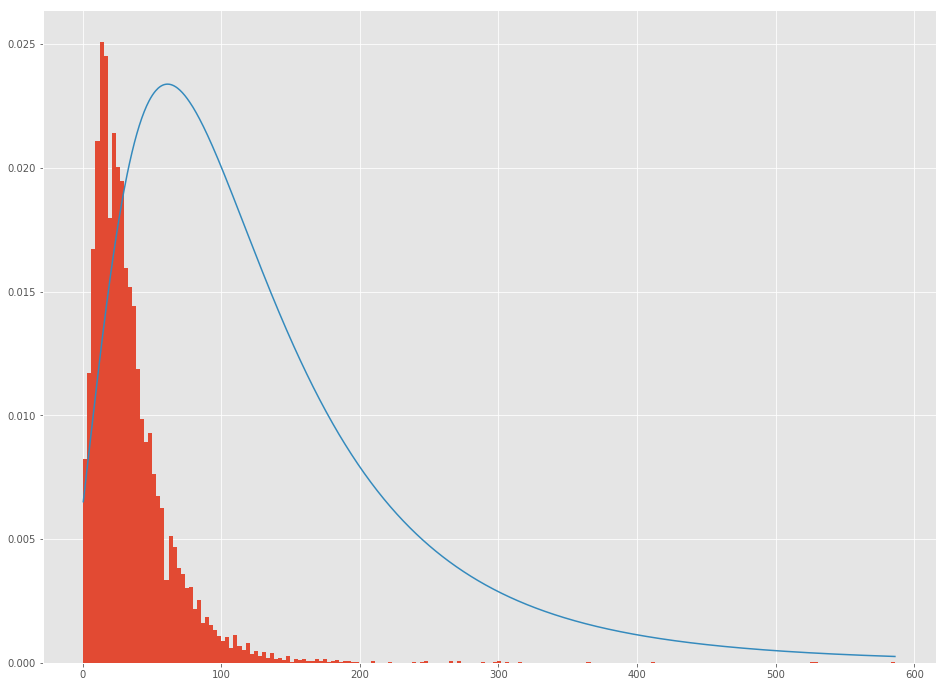

In [193]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = np.linspace(min(data), max(data), 1000)
plt.hist(data, density=True,bins=200)
plt.plot(x, make_pdf(st.ncf, params, 1000))



In [130]:
st.kstest(air_in[air_in.TSP != 0]['TSP'], 'ncf', args=(1.3420914536593611,
  10.873649010039067,
  10.009908426222257,
  0.03017227142859622,
  3.3478809769865916))

KstestResult(statistic=0.01462072789519725, pvalue=0.014654080971662233)

In [21]:
data = air_in[air_in.TSP != 0]['TSP'].diff().dropna()
bfd = best_fit_distribution(data)

NameError: name 'best_fit_distribution' is not defined

In [22]:
bfd

NameError: name 'bfd' is not defined

In [23]:
params = st.cauchy.fit(data)

NameError: name 'st' is not defined

In [24]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

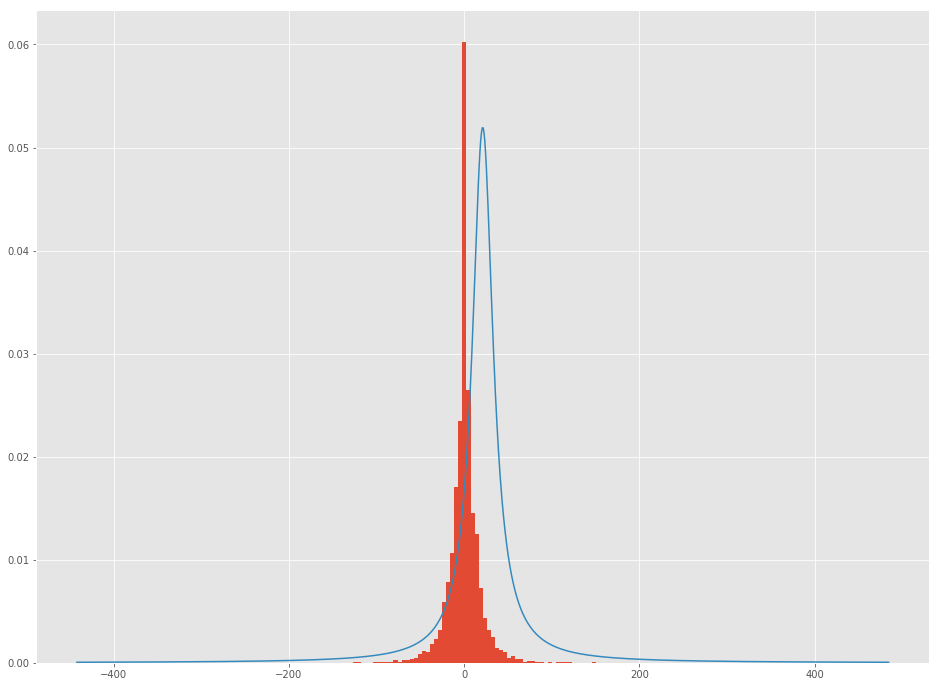

In [198]:
x = np.linspace(min(data), max(data), 1000)
plt.hist(data, density=True,bins=200)
plt.plot(x, make_pdf(st.cauchy, params, 1000))

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

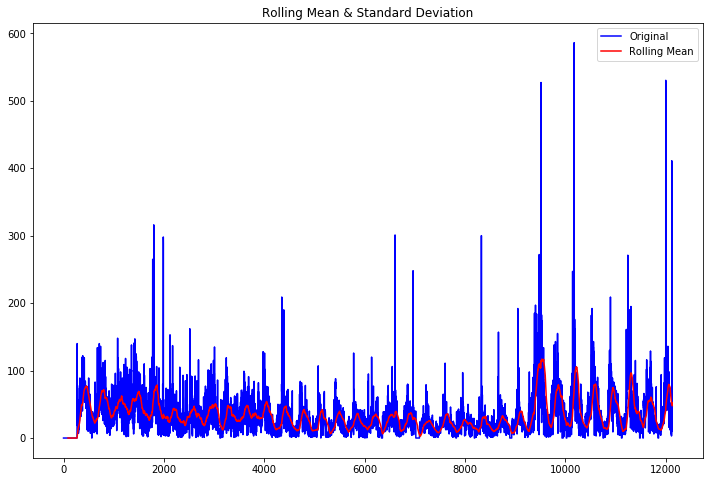

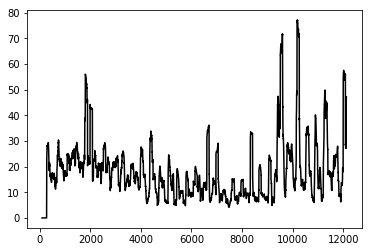

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.091455e+00
p-value                        1.374716e-12
#Lags Used                     3.900000e+01
Number of Observations Used    1.202800e+04
Critical Value (1%)           -3.430894e+00
Critical Value (5%)           -2.861780e+00
Critical Value (10%)          -2.566898e+00
dtype: float64


In [37]:
test_stationarity(air_in['TSP'].dropna(), window = 90, cutoff = 0.05)

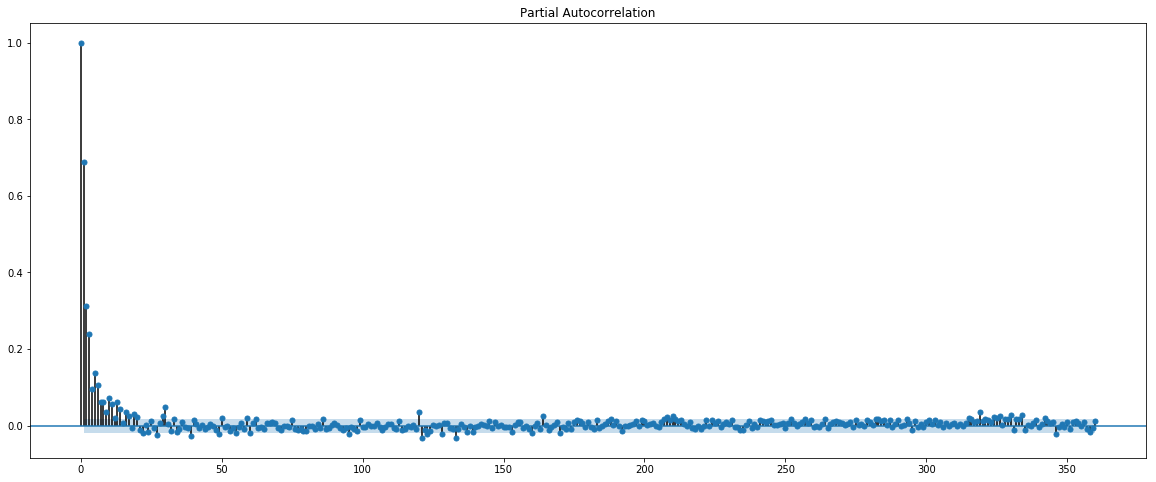

In [113]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20,8))
data = air_in[air_in.TSP != 0]
data = data['TSP']

train_data = data.iloc[:-365]
test_data = data.iloc[-365:]
sm.graphics.tsa.plot_pacf(data.values, lags=360,ax = ax)
plt.show()

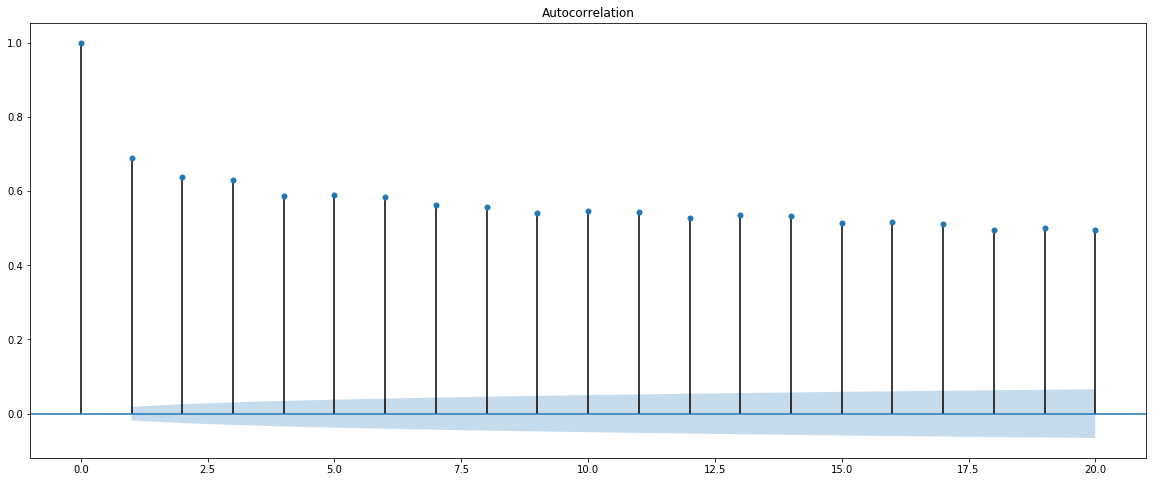

In [105]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(data.values, lags=20,ax = ax)
plt.show()

In [106]:
d = 0
D = 0
s = 12

ps = range(0, 2)
d=0
qs = range(0, 2)
Ps = range(0, 2)
D=0
Qs = range(0, 2)

In [107]:
from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

In [120]:
param = (1, 1, 1, 1)
model=sm.tsa.statespace.SARIMAX(train_data, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)

/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/artemmaksimov/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1051: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.state_error and params_variance == []:


In [121]:
print(model.summary().tables[0])
print(model.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                TSP   No. Observations:                11134
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -48246.279
Date:                            Tue, 21 May 2019   AIC                          96502.558
Time:                                    22:34:04   BIC                          96539.147
Sample:                                         0   HQIC                         96514.878
                                          - 11134                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9934      0.001   1291.250      0.000       0.992       0.995
ma.L1         -0.7207      0.003   

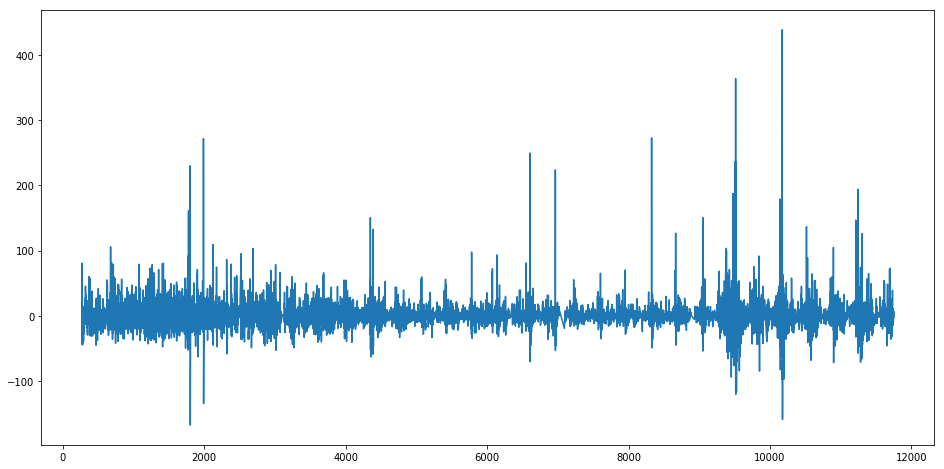

In [110]:
# Остатки модели
plt.figure(figsize=(16,8))
plt.plot(model.resid[1:])
plt.show()

(array([0.00043516, 0.00087032, 0.0018857 , 0.00130548, 0.00145054,
        0.00145054, 0.00145054, 0.00174064, 0.00145054, 0.00130548,
        0.00101538, 0.00130548, 0.00116043, 0.00203075, 0.00304613,
        0.0018857 , 0.00203075, 0.0037714 , 0.00275602, 0.00304613,
        0.00319118, 0.00435161, 0.00464172, 0.00333623, 0.00464172,
        0.0078329 , 0.00478677, 0.00739774, 0.00478677, 0.00652742,
        0.00855817, 0.00797795, 0.0097186 , 0.00870322, 0.00986365,
        0.01102408, 0.01261967, 0.01537569, 0.01581085, 0.01740644,
        0.01798666, 0.02016246, 0.02248332, 0.02509428, 0.02552945,
        0.03104149, 0.02959095, 0.03060632, 0.03147665, 0.03176675,
        0.03684363, 0.03423267, 0.03495793, 0.03147665, 0.03176675,
        0.03118654, 0.02857557, 0.02262837, 0.02291848, 0.02407891,
        0.01885698, 0.01842182, 0.0159559 , 0.01508558, 0.01479547,
        0.01363504, 0.01261967, 0.00986365, 0.00913838, 0.00913838,
        0.00957354, 0.00580215, 0.00667247, 0.00

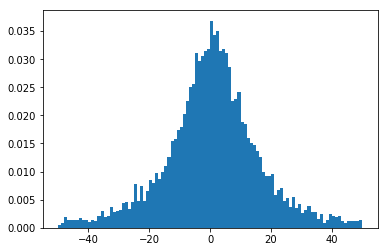

In [31]:
plt.hist(ai_without_rec['TSP'].dropna().diff().dropna(), density=True, bins=100, range=(-50, 50))